In [3]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df = pd.DataFrame(df)

In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


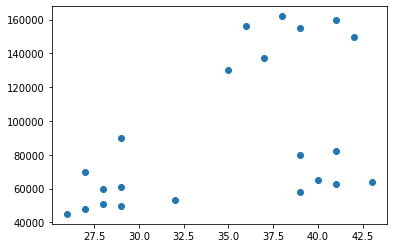

In [6]:
plt.scatter(df['Age'], df['Income($)'])

C:\Users\jvish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income($)'>

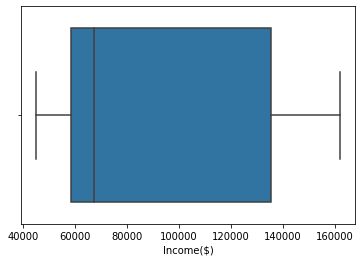

In [7]:
sns.boxplot(df['Income($)'])

In [8]:
scaler = MinMaxScaler()
stdf = scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
stdf = scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

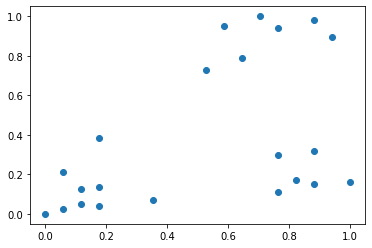

In [9]:
plt.scatter(df['Age'], df['Income($)'])

In [27]:
km = KMeans(n_clusters=3)
clust = km.fit_predict(df[['Age','Income($)']])
clust


2

df['clusters'] = clust
df.head()

In [11]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=100)
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'clusters'

In [16]:
pp=  km.cluster_centers_
pp  

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [ ]:
km.inertia_

0.47507834985530945

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

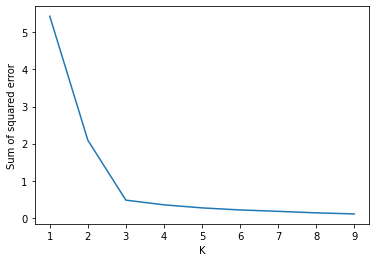

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
float(km.predict([[0,0]]))

C:\Users\jvish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.0